In [10]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import graphviz

data = pd.read_csv("adultdata.csv",sep=',',header=0)


# graphviz
#1 . Download and install graphviz-2.38.msi from https://graphviz.gitlab.io/_pages/Download/Download_windows.html

#2 . Set the path variable

#(a) Control Panel > System and Security > System > Advanced System Settings >  Environment Variables > Path > Edit

#(b) add 'C:\Program Files (x86)\Graphviz2.38\bin'

In [32]:
data.head()

,Age,Workclass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
# find # of points
print("dataset length:"),len(data)

dataset length:


(None, 32561)

In [34]:
# convert data to numeric data for classification (will not process strings)
# alternative is OneHotEncoder

for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [35]:
data.head()

,Age,Workclass,Fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [46]:
# need to get these in our decision tree for readability
names=list(data)
names

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'EducationNum',
 'MaritalStatus',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'CapitalGain',
 'CapitalLoss',
 'HoursPerWeek',
 'NativeCountry',
 'Income']

In [47]:
# Divide columns for dependent and dependent variables
X= data.values[:,1:13]
Y= data.values[:,14] # dependent variable (income)

# separate into training and test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.3,random_state=100)

In [48]:
# Decision Tree Classifier with gini index
gini = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
gini.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

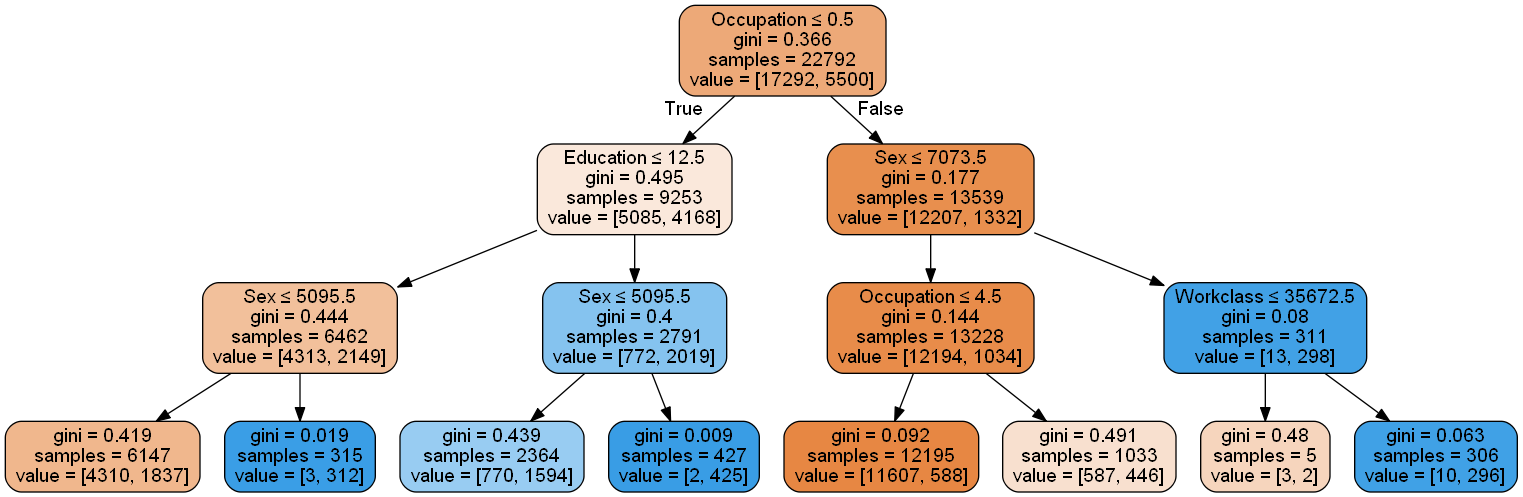

In [52]:
# create visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
#export_graphviz(gini,out_file=dot_data,filled=True,rounded=True,special_characters=True)

# NOT SURE THE LABELS ARE RIGHT!!!!!!!!!!!  TEST WITH ABOVE
export_graphviz(gini,out_file=dot_data,feature_names=names[0:12],filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [53]:
# Decision Tree classifier with criterion information gain
entropy = DecisionTreeClassifier(criterion = "entropy", random_state=100,max_depth=3,min_samples_leaf=5)
entropy.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

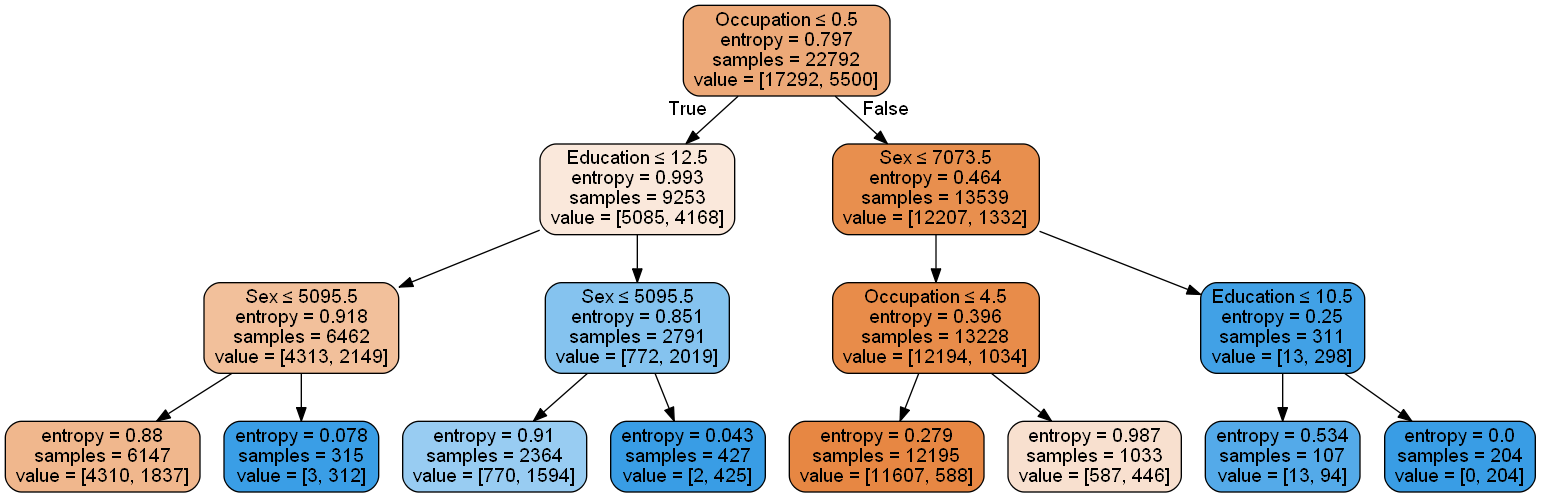

In [55]:
# create visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(entropy,out_file=dot_data,feature_names=names[0:12],filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())